In [9]:
using DataFrames
using Queryverse
using VegaLite
using VegaDatasets
using JSON

In [10]:
# Get zips data

zips = dataset("zipcodes") |>
@mutate(first_digit = string(_.zip_code)[1]) |>
DataFrame;

first(zips, 4)

,zip_code,latitude,longitude,city,state,county,first_digit
,Int64,Float64,Float64,String,String,String,Char
1,501,40.9223,-72.6371,Holtsville,NY,Suffolk,'5'
2,544,40.9223,-72.6371,Holtsville,NY,Suffolk,'5'
3,601,18.1653,-66.7226,Adjuntas,PR,Adjuntas,'6'
4,602,18.3931,-67.181,Aguada,PR,Aguada,'6'


In [11]:
disasters = dataset("disasters") |>
@filter(_.Entity != "All natural disasters") |>
DataFrame;

first(disasters, 4)

,Entity,Year,Deaths
,String,Int64,Int64
1,Drought,1900,1261000
2,Drought,1910,85000
3,Drought,1920,524000
4,Drought,1921,1200000


## Bubble Plot (Natural Disasters)

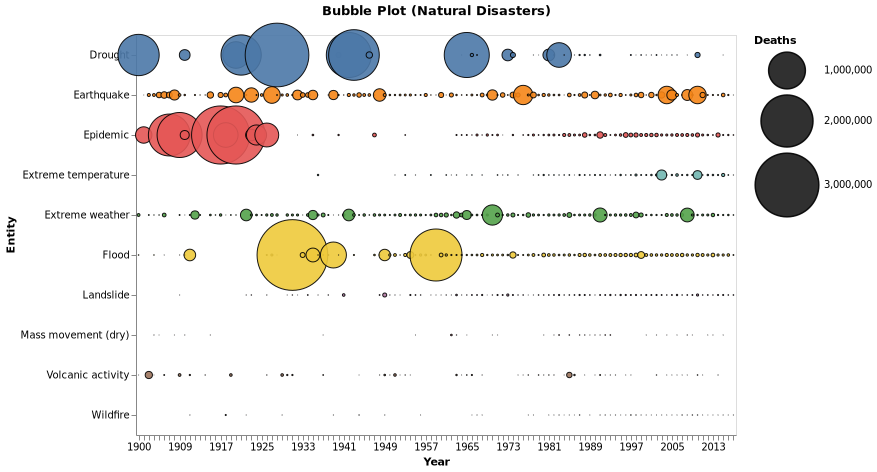

In [12]:
@vlplot(
  data = disasters,
  mark = {:circle, tooltip = true, opacity=0.9, stroke=:black, strokeWidth=1},  # opicity is brighness, stroke is color of edges, strokeWidth thickness of stroke
  x = {"Year:o", axis={labelAngle=0}, }, # axis={labelAngle=0} rotates the axis lables to 0 degrees
  y = "Entity:n",
  size = {"Deaths:q", scale={range=[0,5000]}},
  color = {"Entity:n", legend = false},
  height = 400,
  width = 600,
  title = "Bubble Plot (Natural Disasters)"
)

In [13]:
income = dataset("gapminder-health-income") |>
DataFrame;

first(income, 4)

,country,income,health,population
,String,Int64,Float64,Int64
1,Afghanistan,1925,57.63,32526562
2,Albania,10620,76.0,2896679
3,Algeria,13434,76.5,39666519
4,Andorra,46577,84.1,70473


## Bubble Plot (Gapminder)

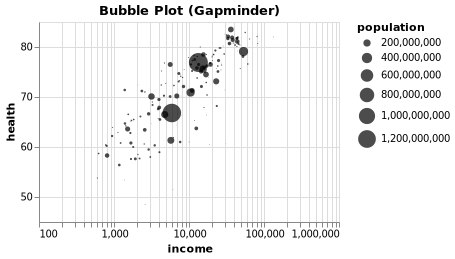

In [14]:
@vlplot(
  data = income,
  mark = :circle,
  x = {"income:q", scale = {type = :log}}, # Set a log-scale for x-axis
  y= {"health:q", scale = {zero = false}}, # y-axis does not start at zero
  size = "population:q",
  height = 200,
  width = 300,
  color={value="#000"},  # Change the color of chart 
  selection={view={type=:interval, bind=:scales}}, # Create interactive zoom
  title = "Bubble Plot (Gapminder)"
  
)

In [15]:
cars = dataset("cars") |>
@select(:Name, :Miles_per_Gallon, :Horsepower, :Origin) |>
DataFrame;

first(cars, 4)

,Name,Miles_per_Gallon,Horsepower,Origin
,String,Float64⍰,Int64⍰,String
1,chevrolet chevelle malibu,18.0,130,USA
2,buick skylark 320,15.0,165,USA
3,plymouth satellite,18.0,150,USA
4,amc rebel sst,16.0,150,USA


## Interactive Scatter Plot with Tooltip

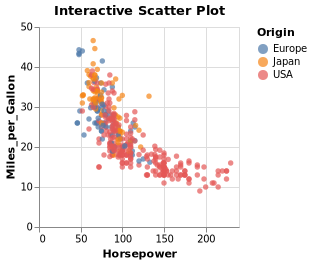

In [16]:
# The tooltip gives the point location
# The selection allows to zoom

@vlplot(
  data = cars, 
  mark = {:circle, tooltip = true}, # Code to include tooltip: tooltip = true
  x="Horsepower:q", 
  y="Miles_per_Gallon:q",
  color = "Origin:n",
  selection={view={type=:interval, bind=:scales}}, # Code for zoom 
  height = 200,
  width = 200,
  title = "Interactive Scatter Plot"
  
)